In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [74]:
import pandas as pd

# Loading data

In [146]:
df = pd.read_csv(fname)
df_original = df.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [77]:
# Dropinh duplicates
df = df.drop_duplicates()

In [78]:
# Count missing values in each column
missing_count = df.isna().sum()
print(missing_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [79]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [80]:
df['Item_Weight'] = df['Item_Weight'].fillna(0.00)

In [81]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [82]:
df["Outlet_Size"] = df["Outlet_Size"].fillna('No Size')

In [83]:
# Missing value count after filling missing values
missing_count = df.isna().sum()
print(missing_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [84]:
'''
  Categorical volumns to probably fix
  Item_Fat_Content
  Item_Type
  Outlet_Location_Type
  Outlet_Type
'''
categorical_columns = ["Item_Fat_Content", "Item_Type", "Outlet_Location_Type", "Outlet_Type"]

for col in categorical_columns:
  print (f"Distinct values for {col}")
  print(df[col].unique())
  print ("\n\n")

Distinct values for Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



Distinct values for Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



Distinct values for Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']



Distinct values for Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']





In [85]:
# All columns have appropiate distinct values , except for Item_Fat_content

replace_dict = {
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replace_dict)

In [86]:
# Check again after normalization
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [87]:
# Getting min, max and mean for numerical columns
numerical_df = df.select_dtypes(include=['number'])
numerical_columns = numerical_df.columns

for num_col in numerical_columns:
  print (f"{num_col} minimum = {numerical_df[num_col].min()}")
  print (f"{num_col} maximum = {numerical_df[num_col].max()}")
  print (f"{num_col} mean = {numerical_df[num_col].mean()}")

Item_Weight minimum = 0.0
Item_Weight maximum = 21.35
Item_Weight mean = 10.650589581133403
Item_Visibility minimum = 0.0
Item_Visibility maximum = 0.328390948
Item_Visibility mean = 0.06613202877895108
Item_MRP minimum = 31.29
Item_MRP maximum = 266.8884
Item_MRP mean = 140.9927819781767
Outlet_Establishment_Year minimum = 1985
Outlet_Establishment_Year maximum = 2009
Outlet_Establishment_Year mean = 1997.8318667135984
Item_Outlet_Sales minimum = 33.29
Item_Outlet_Sales maximum = 13086.9648
Item_Outlet_Sales mean = 2181.288913575032


## Feature Inspection Exercise

| Variable Name          | Description                                                                                  |
|------------------------|----------------------------------------------------------------------------------------------|
| Item_Identifier        | Product ID                                                                                   |
| Item_Weight            | Weight of product                                                                            |
| Item_Fat_Content       | Whether the product is low-fat or regular                                                    |
| Item_Visibility        | The percentage of total display area of all products in a store allocated to the product     |
| Item_Type              | The category to which the product belongs                                                    |
| Item_MRP               | Maximum Retail Price (list price) of the product                                              |
| Outlet_Identifier      | Store ID                                                                                     |
| Outlet_Establishment_Year | The year in which the store was established                                                |
| Outlet_Size            | The size of the store in terms of ground area covered                                         |
| Outlet_Location_Type   | The type of area in which the store is located                                                |
| Outlet_Type            | Whether the outlet is a grocery store or some sort of supermarket                             |
| Item_Outlet_Sales      | Sales of the product in the particular store. This is the target variable to be predicted.   |


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df_original.info()
df_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA Functions

In [139]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_original.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



  # TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_original.copy()


  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=temp_df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=temp_df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [140]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_original.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df_original[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Inspecting Each Feature

### Define your target column:
Item_Outlet_Sales

### Item_Identifier

In [92]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df_original[feature].dtype

dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


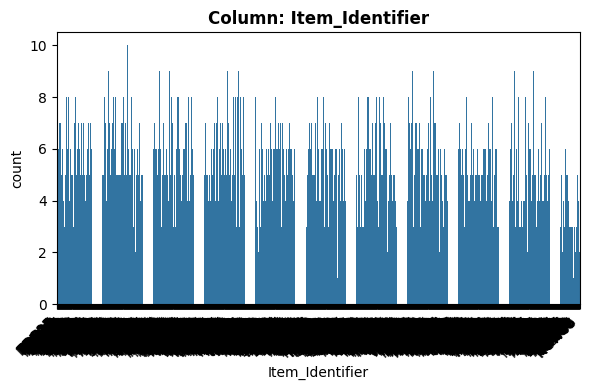

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [93]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 1559 unique categories.
  - Yes Very High (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


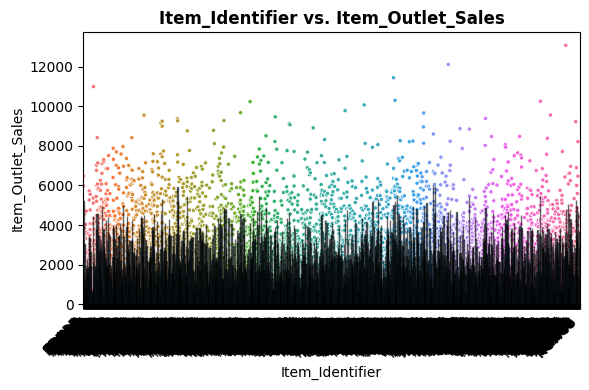

In [94]:
plot_categorical_vs_target(df_original, 'Item_Identifier', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 No
### Does this feature appear to be a predictor of the target?
 No

### Item_Weight


In [95]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_original[feature].dtype

dtype('float64')

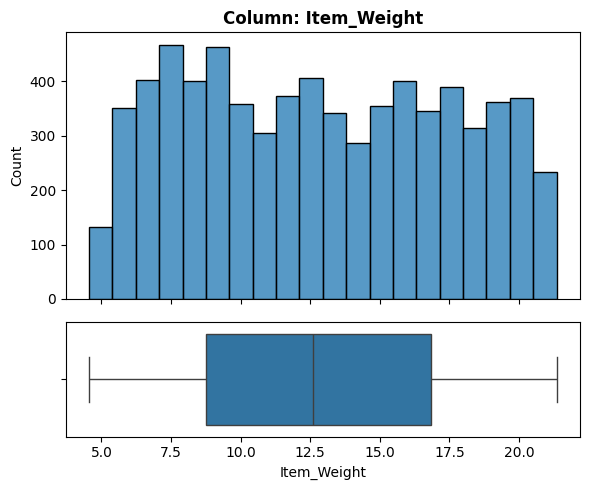

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [96]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


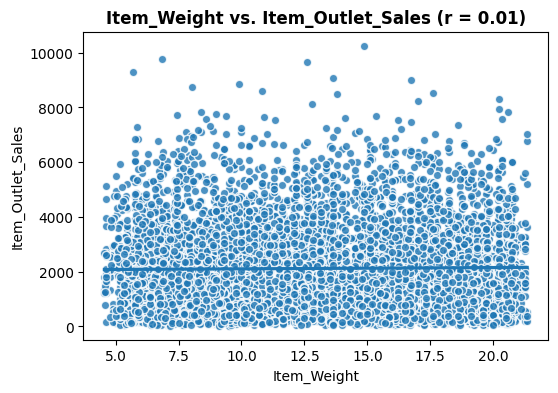

In [97]:
plot_numeric_vs_target(df_original, 'Item_Weight', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?

### Does this feature appear to be a predictor of the target?


### Item_Fat_Content

In [98]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df_original[feature].dtype

dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


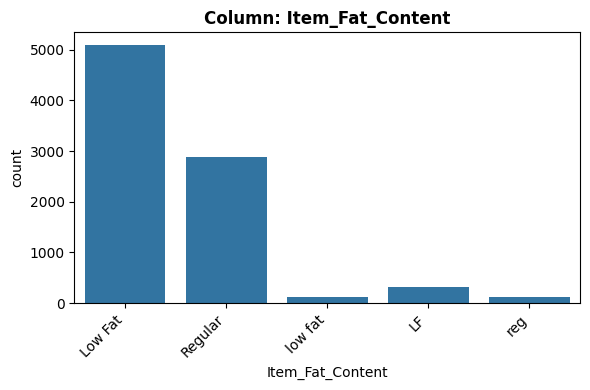

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [99]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 5 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


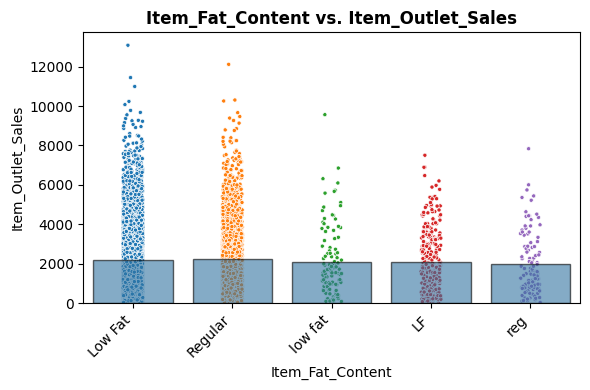

In [100]:
plot_categorical_vs_target(df_original, 'Item_Fat_Content', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_Visibility

In [101]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

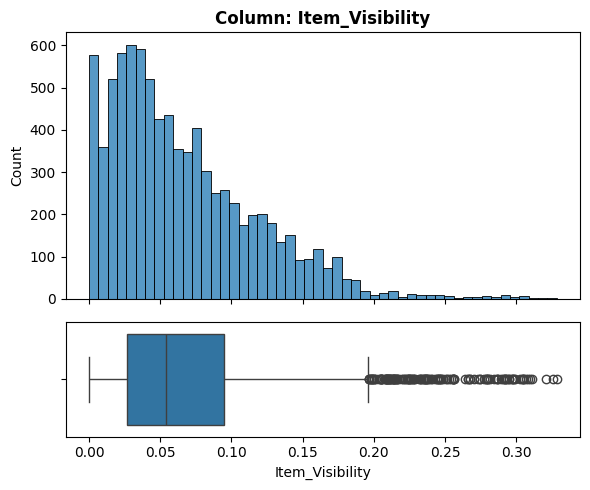

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [102]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0
  

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


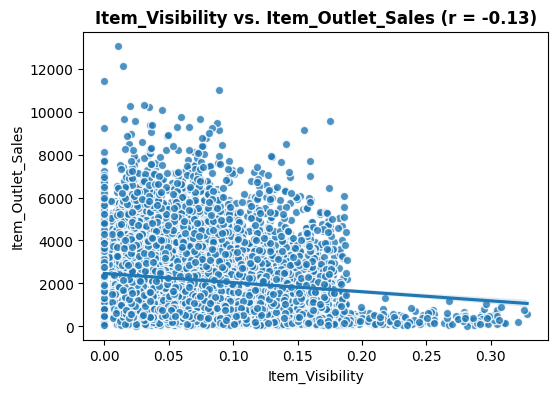

In [103]:
plot_numeric_vs_target(df_original, 'Item_Visibility', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_Type

In [104]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


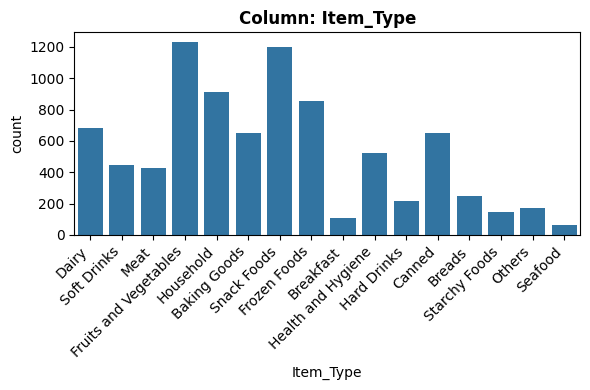

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [105]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  -  high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


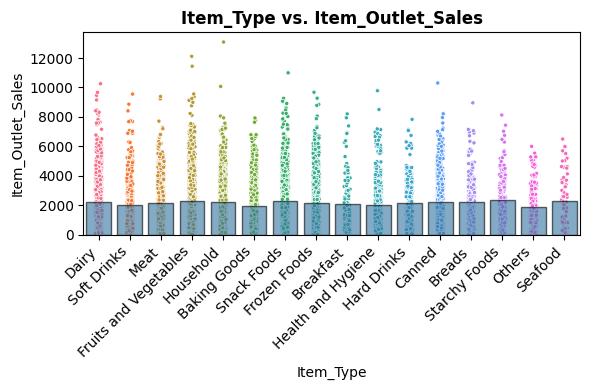

In [106]:
plot_categorical_vs_target(df_original, 'Item_Type', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_MRP

In [107]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

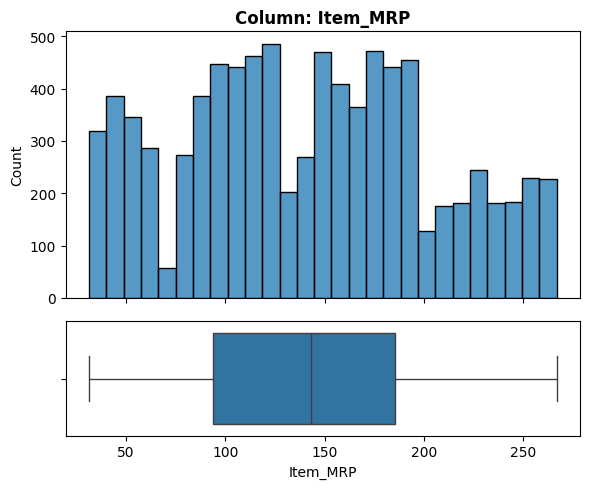

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [108]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


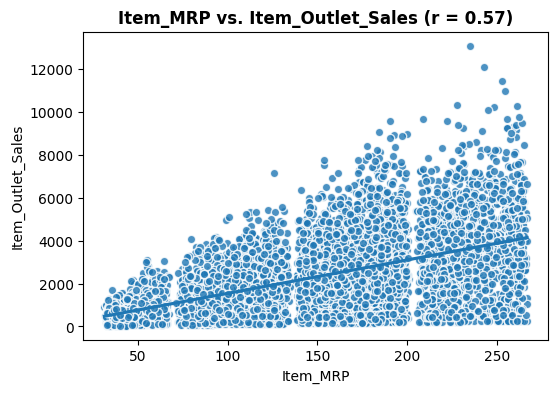

In [109]:
plot_numeric_vs_target(df_original, 'Item_MRP', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Identifier

In [110]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


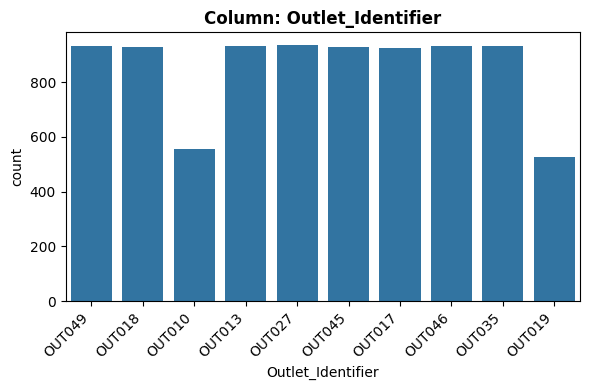

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [111]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  -  high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


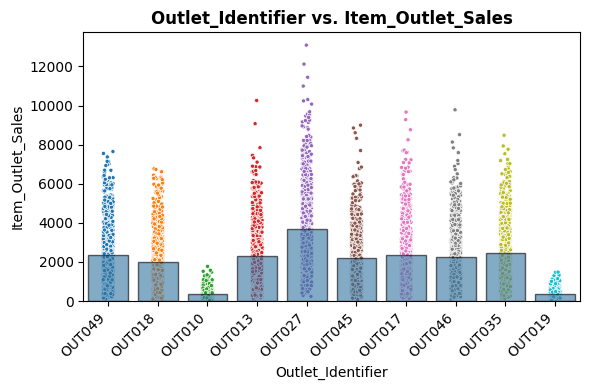

In [112]:
plot_categorical_vs_target(df_original, 'Outlet_Identifier', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Establishment_Year

In [113]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

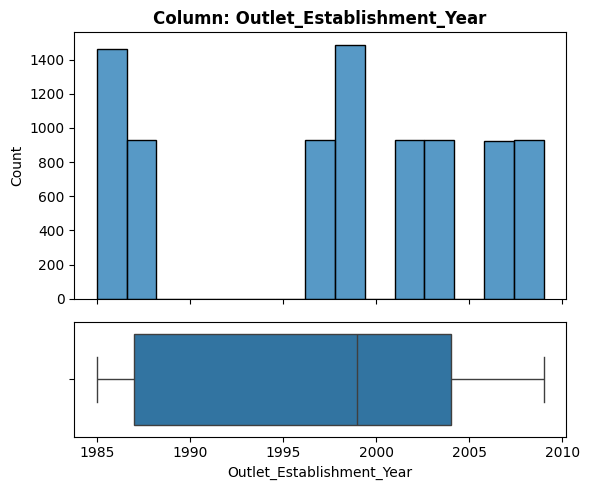

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [114]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0
  

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


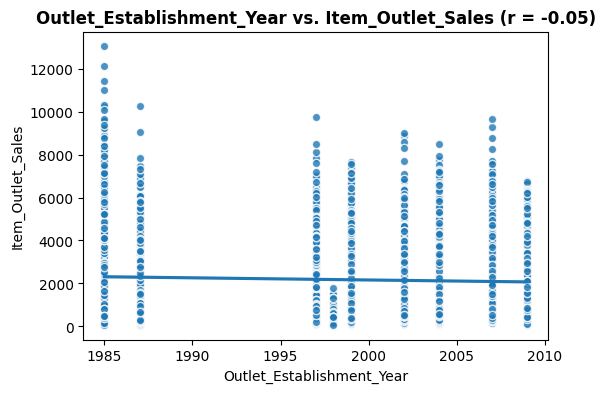

In [115]:
plot_numeric_vs_target(df_original, 'Outlet_Establishment_Year', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Size

In [116]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


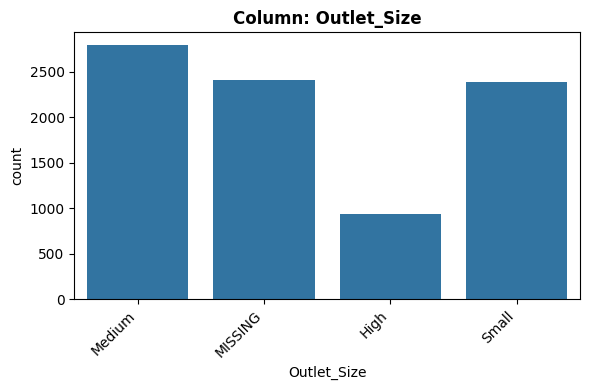

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [117]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  -  high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


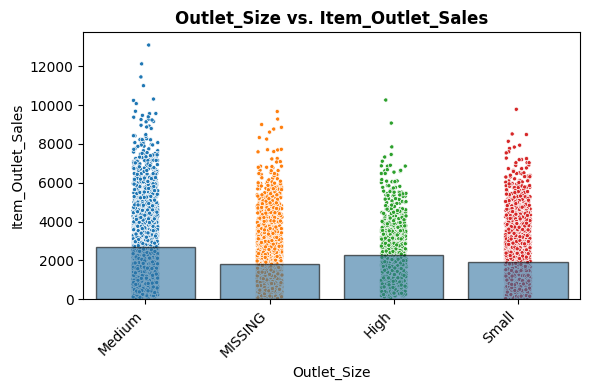

In [118]:
plot_categorical_vs_target(df_original, 'Outlet_Size', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Location_Type

In [119]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype



dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


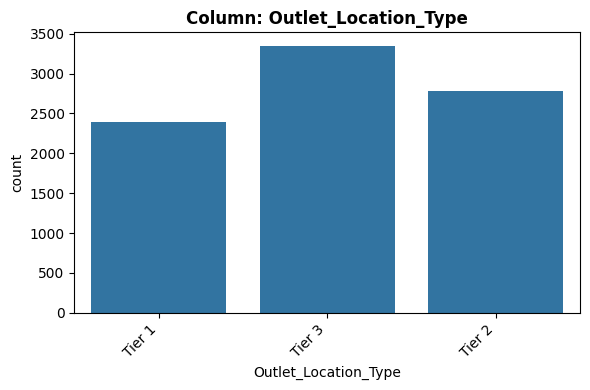

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [120]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


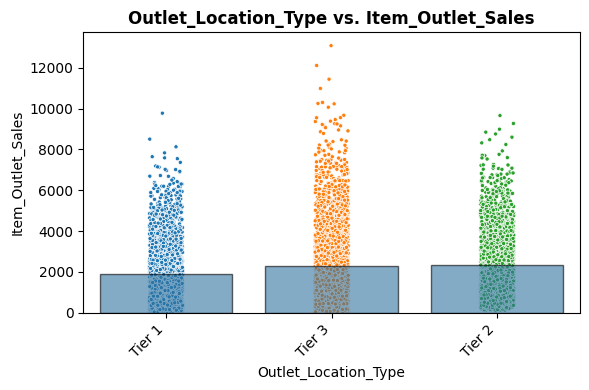

In [121]:
plot_categorical_vs_target(df_original, 'Outlet_Location_Type', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Type

In [122]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype



dtype('O')

<ipython-input-90-098d89f66b61>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


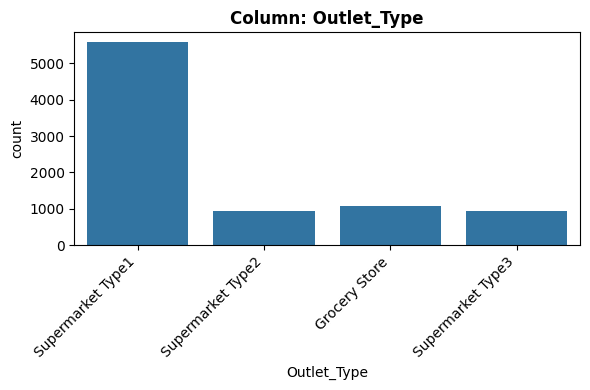

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [123]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-91-23dc3fac8939>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


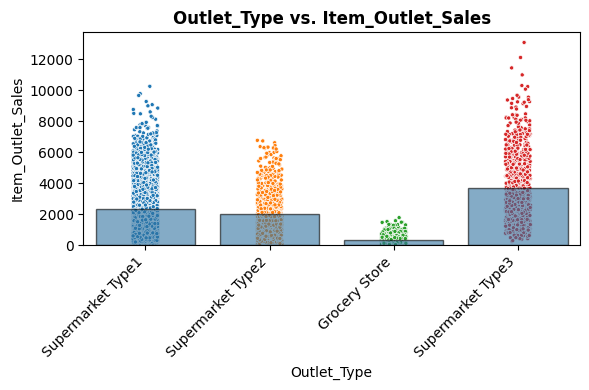

In [124]:
plot_categorical_vs_target(df_original, 'Outlet_Type', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_Outlet_Sales (target)

In [125]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype



dtype('float64')

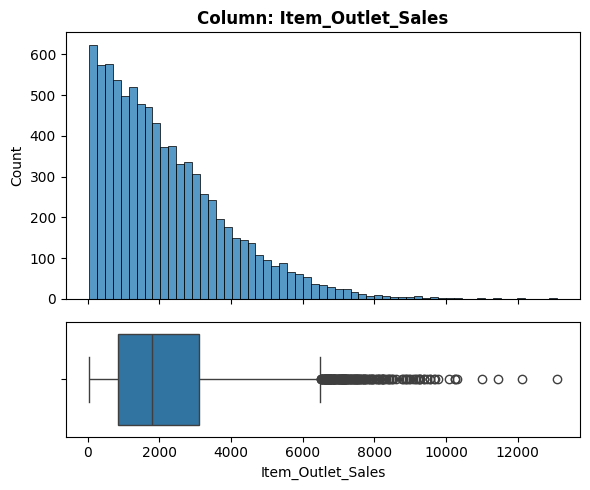

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [126]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature!

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!



# Project 1 - Part 5


## Preprocesing for Machine Learning


### Imports

In [184]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Load Data

In [190]:

fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023 (1).csv'
df2 = pd.read_csv(fpath)
#df = df.set_index("")
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Dictionary

| Variable Name            | Description                                                  |
|--------------------------|--------------------------------------------------------------|
| Item_Identifier          | Unique product ID                                            |
| Item_Weight              | Weight of product                                            |
| Item_Fat_Content         | Whether the product is low fat or regular                   |
| Item_Visibility          | The percentage of total display area of all products        |
|                          | in a store allocated to the particular product               |
| Item_Type                | The category to which the product belongs                    |
| Item_MRP                 | Maximum Retail Price (list price) of the product            |
| Outlet_Identifier        | Unique store ID                                              |
| Outlet_Establishment_Year| The year in which store was established                     |
| Outlet_Size              | The size of the store in terms of ground area covered        |
| Outlet_Location_Type     | The type of area in which the store is located               |
| Outlet_Type              | Whether the outlet is a grocery store or supermarket         |
| Item_Outlet_Sales        | Sales of the product in the particular store                 |
|                          | This is the target variable to be predicted                  |


In [167]:
df2 = df2.drop(columns=['Item_Identifier'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [168]:
missing_count = df2.isna().sum()
missing_count

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [169]:
df2['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [170]:
df2['Item_Weight'] = df2['Item_Weight'].fillna(0.00)

In [171]:
df2["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [172]:
df2["Outlet_Size"] = df2["Outlet_Size"].fillna('No Size')

In [173]:
df2.duplicated().sum()

0

In [174]:
missing_count = df2.isna().sum()
missing_count

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [175]:
categorical_columns = df2.select_dtypes('object').columns

for col in categorical_columns:
  print (f"Distinct values for {col}")
  print(df2[col].unique())
  print ("\n\n")

Distinct values for Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



Distinct values for Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



Distinct values for Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']



Distinct values for Outlet_Size
['Medium' 'No Size' 'High' 'Small']



Distinct values for Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']



Distinct values for Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']





In [176]:
replace_dict = {
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
}
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace(replace_dict)

In [177]:
# Check again after normalization
df2['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [178]:
categorical_columns = df2.select_dtypes('object').columns

for col in categorical_columns:
  print (f"Distinct values for {col}")
  print(df2[col].unique())
  print ("\n\n")

Distinct values for Item_Fat_Content
['Low Fat' 'Regular']



Distinct values for Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



Distinct values for Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']



Distinct values for Outlet_Size
['Medium' 'No Size' 'High' 'Small']



Distinct values for Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']



Distinct values for Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']





In [179]:
numeric_columns = df2.select_dtypes('number').columns

for col in numeric_columns:
  impossible_values = df2[(df2[col] < 0)]

  if not impossible_values.empty:
        print("Impossible numeric values found in column '{}':".format(col))
        print(impossible_values)
        print("\nImpossible numeric values fixed.")

  else:
        print("No impossible numeric values found in column '{}'.".format(col))
  print (f"Distinct values for {col}")
  #print(df[col].unique())
  print ("\n\n")


No impossible numeric values found in column 'Item_Weight'.
Distinct values for Item_Weight



No impossible numeric values found in column 'Item_Visibility'.
Distinct values for Item_Visibility



No impossible numeric values found in column 'Item_MRP'.
Distinct values for Item_MRP



No impossible numeric values found in column 'Outlet_Establishment_Year'.
Distinct values for Outlet_Establishment_Year



No impossible numeric values found in column 'Item_Outlet_Sales'.
Distinct values for Item_Outlet_Sales





In [180]:
# Define features and target
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']


In [181]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [182]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [185]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Item_Fat_Content', 'Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order_1 = ['Low Fat','Regular']
qual_cond_order_2 = ['Medium', 'No Size', 'High', 'Small']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order_1, qual_cond_order_2]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Item_Fat_Content', 'Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                            ['Medium', 'No Size', 'High',
                                             'Small']])),
                ('standardscaler', StandardScaler())])

In [186]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [189]:
# Showing X_train and y_train
display(X_train.head(5), y_train.head(5))



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,No Size,Tier 2,Supermarket Type1


4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64